In [47]:
%matplotlib notebook


In [48]:
#Dependancies

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random

In [49]:
# Study data files
mouse_metadata = "Pymaceuticals/data/Mouse_metadata.csv"
study_results = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single data
combined_pymaceutical_data = pd.merge(study_results,mouse_metadata, how="left", on="Mouse ID")

combined_pymaceutical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [50]:
# Summary Statistics

#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen 
tumor_vol_groupby_mean = combined_pymaceutical_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_vol_groupby_median = combined_pymaceutical_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_vol_groupby_sem = combined_pymaceutical_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
tumor_vol_groupby_std_Dev = combined_pymaceutical_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

#Creating Dataframe

tumor_vol_dataframe = pd.DataFrame({"Mean Tumor Volume":tumor_vol_groupby_mean,
                                   "Median Tumor Volume":tumor_vol_groupby_median,
                                   "Tumor Volume Std.Dev.":tumor_vol_groupby_std_Dev,
                                   "SEM":tumor_vol_groupby_sem})
tumor_vol_dataframe

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Std.Dev.,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.322552,50.854632,6.507770,0.512884
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


<IPython.core.display.Javascript object>


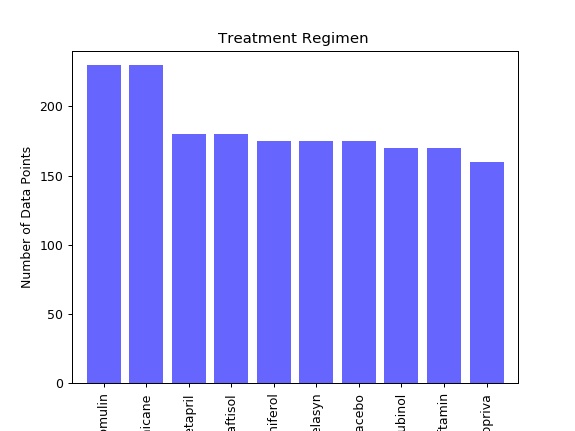

In [51]:
# Generating a bar plot showing the number of data points for each treatment regimen using pandas

#generating y and x Axis
points = [230,230,180,180,175,175,175,170,170,160]
x_axis = np.arange(len(points))

#making the bar chart
plt.bar(x_axis,points,color='b',alpha=0.6, align="center")


#placing x_axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Stelasyn","Placebo",
                          "Infubinol","Ceftamin","Propriva"],
          rotation="vertical")

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(points)+10)

# Assigning title and labels

plt.title("Treatment Regimen ")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show()

<IPython.core.display.Javascript object>


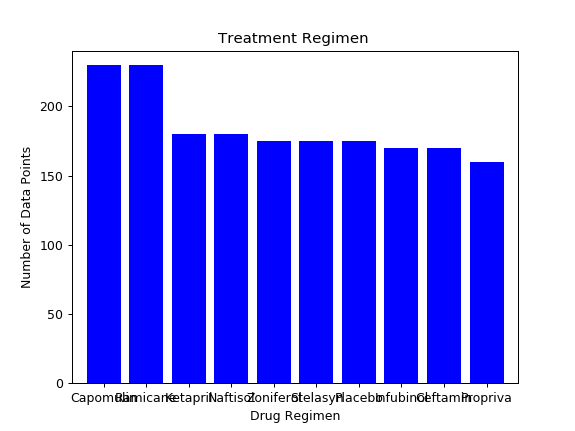

Text(0, 0.5, 'Number of Data Points')

In [52]:
# Generating a bar plot showing the number of data points for each treatment regimen using pyplot
drugs =["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Stelasyn","Placebo",
                          "Infubinol","Ceftamin","Propriva"]
# Create a bar chart based upon the above data
number_of_data_points= [230,230,180,180,175,175,175,170,170,160]
x_axis = x_axis = np.arange(len(number_of_data_points))

# Create a bar chart based upon the above data
plt.bar(x_axis, number_of_data_points, color="b", align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs)

# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)

# Set the limits of the y axis
plt.ylim(0, max(number_of_data_points)+10)

plt.title("Treatment Regimen ")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

# plt.show()

In [42]:
#Generating a pie plot showing the distribution of females versus male mice using pandas

#mice sex count

mice_gender_count = combined_pymaceutical_data["Sex"].value_counts()

mice_gender_count.head()




Male      958
Female    935
Name: Sex, dtype: int64

<IPython.core.display.Javascript object>


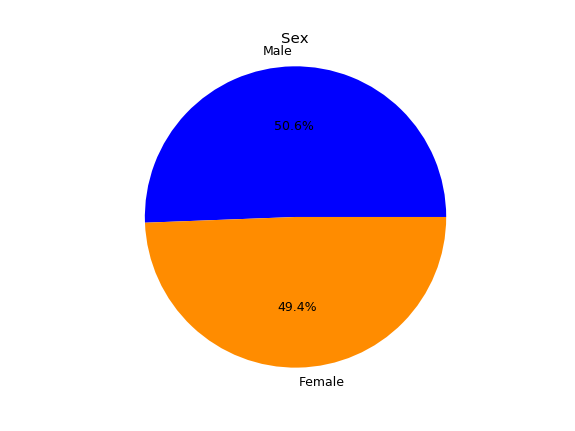

In [53]:
# Labels for the sections of the pie chart
labels = ["Male","Female"]

# The values of each section of the pie chart
sizes = [958,935]


# The colors of each section of the pie chart
colors = ["blue","darkorange"]

#Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes,labels=labels, colors=colors,
        autopct="%1.1f%%")

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.title("Sex", loc="center")


plt.show()


In [44]:
# Generating a pie plot showing the distribution of female mice versus male mice using pyplot



In [45]:
# Quartiles, Outliers and Boxplots

#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [46]:
final_tumor_vol_mouse = combined_pymaceutical_data.

SyntaxError: invalid syntax (<ipython-input-46-22a2141f0bea>, line 1)

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.  